<a href="https://colab.research.google.com/github/tigran-serobyan/keyword_spotting/blob/main/Spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
from IPython.display import Audio
from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift

plt.style.use('seaborn-whitegrid') # Plot style
plt.rcParams['figure.figsize'] = (12.0, 4.0) # Plot size

##Downloading files

In [2]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

--2022-12-12 09:27:13--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.196.128, 2607:f8b0:4001:c1a::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.196.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘speech_commands_v0.02.tar.gz’

speech_commands_v0. 100%[===================>]   2.26G   260MB/s    in 9.5s    

2022-12-12 09:27:23 (244 MB/s) - ‘speech_commands_v0.02.tar.gz’ saved [2428923189/2428923189]



In [3]:
#Unzipping
!mkdir ./data
!tar -xf ./speech_commands_v0.02.tar.gz -C ./data

##Defining functions

In [4]:
def plot_track(t, track):
  plt.plot(t, track)
  plt.show()

In [5]:
def spectrogram(t, track, sr, NFFT = 256):
  plot_track(t, track)
  Pxx, freqs, bins, im = plt.specgram(track, NFFT=NFFT,Fs=sr, noverlap=NFFT/2, cmap='viridis')
  plt.show()

In [6]:
def read_file(file_name):
  samplerate, signal = wavfile.read(file_name)
  signal = np.array(signal, dtype=np.float32)
  return signal, samplerate

##Examples

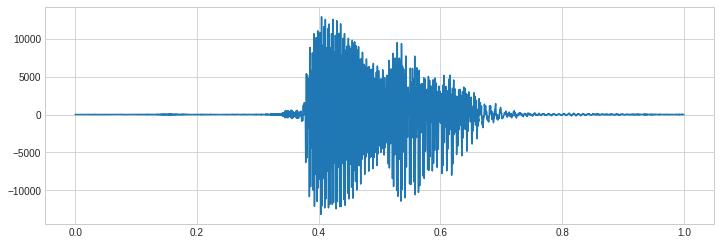

In [7]:
f, sr = read_file('/content/data/four/0132a06d_nohash_3.wav')
t = np.linspace(0, len(f)/sr, len(f))
plot_track(t, f)

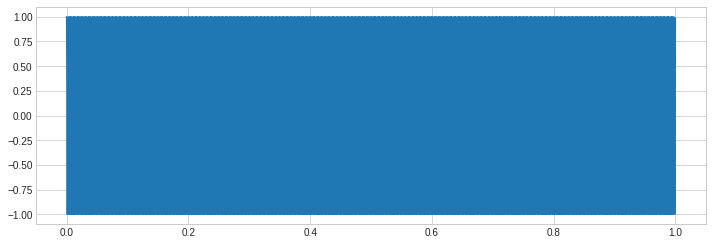

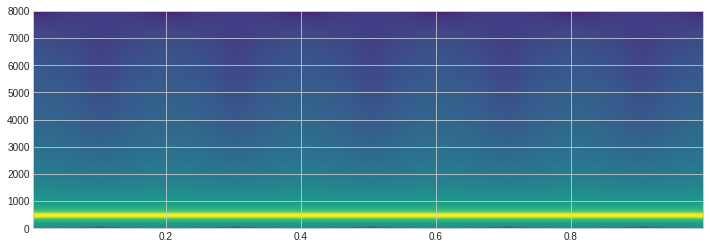

In [8]:
sr = 16000   # Sampling rate
t = np.arange(0, 1, 1/sr)

# Creating constant frequency wave
f = np.cos(2*np.pi*t*440)

# Showing the spectogram of the wave
spectrogram(t, f, sr)

Audio(data=f, rate=sr)

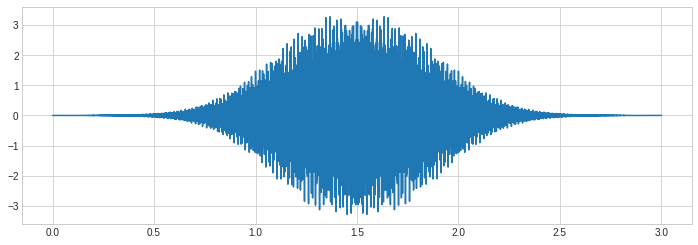

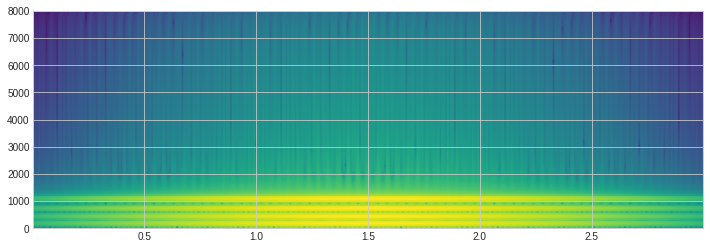

In [9]:
sr = 16000   # Sampling rate
t = np.arange(0, 3, 1/sr)

# Sum of constant frequency waves
f = np.cos(2*np.pi*t*147) + np.cos(2*np.pi*t*404) + np.cos(2*np.pi*t*699) + np.cos(2*np.pi*t*1051)
f *= np.exp(-(2*t-3)**2)

spectrogram(t, f, sr)

Audio(data=f, rate=sr)

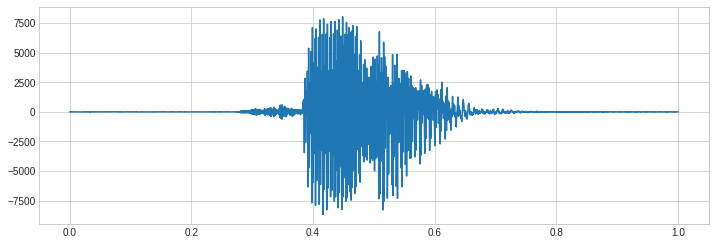

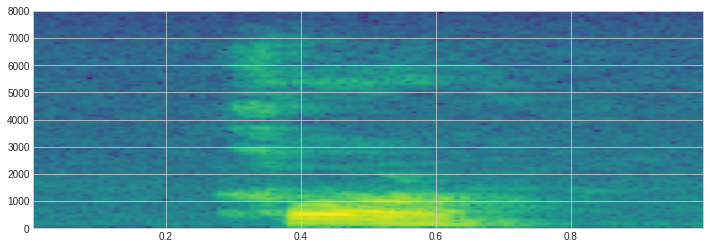

In [10]:
# Reading the file
f, sr = read_file('/content/data/four/0132a06d_nohash_1.wav')
t = np.linspace(0, len(f)/sr, len(f))

# Showing the spectrogram of the audiofile
spectrogram(t, f, sr)

Audio(data=f, rate=sr)